#### We have been given a data which is a subset of a bigger dataset which was collected by Buffalo Tax department. It contains information regarding the various properties in Buffalo.

Number of Instances: 92508

Number of Attributes: 16 (including the target variable)

Attribute Information:

| Column Name                | Description                                                                                                                                      | Type        |
|----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| TOTAL VALUE                | The combined assessed value of the land and improvements on the parcel                                                                           | Number      |
| FRONT                      | The width of the front of property (in feet)                                                                                                     | Number      |
| DEPTH                      | The depth of the property (in feet)                                                                                                              | Number      |
| PROPERTY CLASS             | Property Type Classification Codes describe the primary use of each parcel of real property on the assessment roll                               | Number      |
| LAND VALUE                 | The assessed value of the land                                                                                                                   | Number      |
| SALE PRICE                 | The price that the parcel of real property was last sold for                                                                                     | Number      |
| YEAR BUILT                 | The year the primary building on the parcel was built                                                                                            | Number      |
| TOTAL LIVING AREA          | The amount of living space (in square feet)                                                                                                      | Number      |
| OVERALL CONDITION          | A grade of the condition of the property                                                                                                         | Number      |
| BUILDING STYLE             | A code for the style of building                                                                                                                 | Number      |
| HEAT TYPE                  | The type of heating system in the building (only applicable to residential properties)                                                           | Number      |
| BASEMENT TYPE              | The type of basement on the property (only applicable to residential properties)                                                                 | Number      |
| # OF STORIES               | The number of floors/Stories in the property                                                                                                     | Number      |
| # OF FIREPLACES            | The number of fireplaces in a dwelling (only applicable to residential properties)                                                               | Number      |
| # OF BEDS                  | The number of beds in a dwelling (only applicable to residential properties)                                                                     | Number      |
| # OF BATHS                 | The number of baths in a dwelling (only applicable to residential properties)                                                                    | Number      |
| # OF KITCHENS              | The number of kitchens in a dwelling (only applicable to residential properties)                                                                 | Number      |



There are no missing Attribute Values.

Your task is to implement a Linear Regression Model to predict the TOTAL VALUE of a property

In [193]:
# imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

#### STEP 1 - Load Data (Already Done)

In [194]:
# loads csv file into pandas dataframe
df = pd.read_csv('data.csv', dtype=np.float64)

In [195]:
# takes out total value column (target) and flattens it as as numpy array
y = np.asarray(df['TOTAL VALUE'] )
y = y.reshape(y.shape[0],1)
# converts column names to a list and removes target column
feature_cols = df.columns.to_list()
feature_cols.remove('TOTAL VALUE')
# indexes the dataframe to get just the feature columns then turns it into a numpy array
x = np.asarray(df[feature_cols])

Variable **y** contains the total values of the property

Variable **x** contains the features

#### STEP 2 - 
Split the Data into training and testing and validation split 

( 70% Training, 20% Testing and 10% validation) 

Hint: you can use the sklearn library for this step only

The train_test split function is already imported earlier in the notebook

( 5 Points)

In [196]:
#STEP 2
X_train, X_rem, y_train, y_rem = train_test_split(x,y, test_size=0.3) #splitting the data into 70% train
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.667) #remaining 30% is split into validation and test

#### STEP 3 - Scale Data Using Min Max Scaler (10 Points)
For each feature scaled value can be calculated using $  x_{scaled} = \frac{x - min(x)}{max(x) - min(x)}$

You can write everything in the cell below or add more cells as needed especially if you want to write a helper function which you use to do this

In [198]:
#STEP 3
#Finding the min max scaler
def minmax_scaler(feature):
    feature_scaled = (feature - feature.min())/ (feature.max() - feature.min()) 
    return feature_scaled

train_data_scaled = np.empty(X_train.shape)
val_data_scaled = np.empty(X_valid.shape)
test_data_scaled = np.empty(X_test.shape)

#Scaling train data, test data and validation data
for i in range(15):
    train_data_scaled[:, i] = np.apply_along_axis(minmax_scaler, 0, X_train[:,i])
    val_data_scaled[:, i] = np.apply_along_axis(minmax_scaler, 0, X_valid[:,i])
    test_data_scaled[:, i] = np.apply_along_axis(minmax_scaler, 0, X_test[:,i])
    

#### STEP 4 - Initialize values for the weights, No. of Epochs and Learning Rate (5 Points)

In [199]:
#STEP 4
#Intializing values for the weights, No. of Epochs and Learning Rate
import random
random.seed(123)
bias = np.random.normal(1)
w = np.random.normal(0,1,15)
epoch = 1000
L = 0.1

#### STEP 5 - Train Linear Regression Model (40 Points)
 5.1 Start a Loop For each Epoch
 
 5.2 Find the predicted value using $ y(x,w) = w_0 + w_1x $ for the training and validation splits (10 Points)
 
 5.3 Find the Loss using Mean Squared Error for the training and validation splits and store in a list (10 Points)
 
 5.4 Calculate the Gradients (15 Points)
 
 5.5 Update the weights using the gradients (5 Points)

In [200]:
def prediction(weight, b, x): #prediction of y for a given set of weight, bias and input variable, x
    n1 = x.shape[0]
    y_pred = np.zeros(shape=(n1,1))
    for i in range(15):
        y_pred = y_pred + (w[i]*x[:,i].reshape(n1,1))
    y_pred = y_pred + b    
    return y_pred

In [201]:
def gradient_w(y, y_predicted, x): #Derivatives of loss w.r.t weights except bias
    s=0
    n=x.shape[0]
    for i in range(n):
        s+=-x[i, :]*(y[i]-y_predicted[i])
    return (2/n)*s

In [202]:
def gradient_bias(y,y_predicted): #Derivatives of loss w.r.t bias 
    n=x.shape[0]
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n)*s

In [203]:
def loss_fn(y, y_predicted): #calculating loss function for a given y and it's prediction using Mean squared error formula
    n=y.shape[0]
    s= np.sum(np.square(y_predicted - y))/n
    return s

In [204]:
# STEP 5
# Computing the predictions
L_train = [] #
L_val = []
for i in range(epoch):    
    y_pred_train = prediction(w, bias, train_data_scaled) #prediction for training data
    y_pred_val = prediction(w, bias, val_data_scaled) #prediction for validation data
    y_pred_test = prediction(w, bias, test_data_scaled) #prediction for test data
    L_train.append(loss_fn(y_train, y_pred_train)) #Loss using Mean Squared Error for the training and stored in a list 
    L_val.append(loss_fn(y_valid, y_pred_val)) #Loss using Mean Squared Error for the validation split and stored in a list     
    w = w - L *gradient_w(y_train, y_pred_train, train_data_scaled)  #calculating gradient wrt w and updating weight
    bias = bias - L * gradient_bias(y_train, y_pred_train)  #calculating gradient wrt bias and updating bias
    

#### STEP 6 - Evaluate the Model ( 25 Points)
6.1 Plot a graph of the Training and Validation Loss with respect to epochs 

Matplotlib would definitely be useful for this and is imported for you already

(10 Points)

6.2 Find the R2 Score of the trained model for the Train, Test and Validation splits (15 Points)

0.01650095524382899
0.012049352609164959
0.06348450642938057


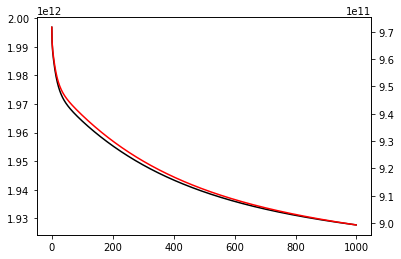

In [206]:
# STEP 6
fig, ax1 = plt.subplots() 
ax2 = ax1.twinx()

ax1.plot(L_train, color='black') #Plotting a graph of the Training Loss with respect to epochs
ax2.plot(L_val, color='red') #Plotting a graph of the Validation Loss with respect to epochs

def R_square(y_cap, y, b, weight): #defining R squared formula which is SST divided by SSR 
    SSR = np.sum(np.square(y_cap - y.mean())) #the total sum of squares
    SST = np.sum(np.square(y - y.mean())) #the total sum of squares of residuals    
    score  = SSR/SST
    return score

R2_train = R_square(y_pred_train, y_train, bias, w) 
R2_test = R_square(y_pred_val, y_test, bias, w)
R2_val = R_square(y_pred_test, y_valid, bias, w)

print(R2_train) #R2 Score of the trained model for the Train split
print(R2_test) #R2 Score of the trained model Test split
print(R2_val) #R2 Score of the trained model for the Validation split

## Useful Library references

  [test_train_split function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)


[Matplotlib Documentation](https://matplotlib.org/)
